# Thinking1

1.如果你是某P2P租车的技术负责人，你会如何设计个性化推荐和搜索排序,阐述相似车型，搜索排序的设计方法,可能的embedding策略
答：1.根据车型（包括汽车品牌、汽车类型、汽车大小）、价格以及待租车所在的地点等对待租车进行描述，当用户点击进入某车的详细信息时，向用户推荐与该车相似度较高的TOP10,从而实现短期实时个性化推荐。2.根据用户画像对用户进行分类，同时根据汽车类型，建立用户群和汽车类型相关的推荐关系，从而实现长期个性化推荐需求。



# Action1

In [7]:
import pandas as pd
dataset=pd.read_csv('G://python_lesson//L12//L12//credit_default//UCI_Credit_Card.csv',index_col='ID')
dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


In [8]:
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

(30000, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3          

In [10]:
next_month=dataset['default.payment.next.month'].value_counts()

In [11]:
df=pd.DataFrame({'default.payment.next.month':next_month.index,'values':next_month.values})

In [12]:
df

,default.payment.next.month,values
0,0,23364
1,1,6636


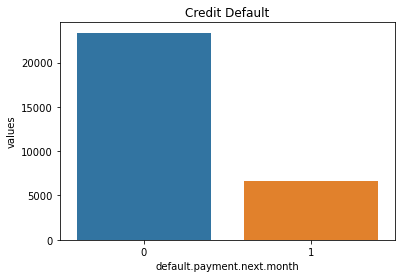

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('Credit Default')
sns.barplot(x='default.payment.next.month',y='values',data=df)
plt.show()

In [23]:
target=dataset['default.payment.next.month'].values
cloumns=dataset.columns.tolist()
cloumns.remove('default.payment.next.month')

In [26]:
features=dataset[cloumns].values

In [49]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [52]:
from  sklearn.model_selection  import train_test_split
train_x,test_x,train_y,test_y=train_test_split(features,target,test_size=0.3)

In [55]:
classifer=[SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]
classifier_names=['svc','decissiontreeclassifier','randomforestclassifier','knerighborclassifier']
#分类器
classfier_param_grid=[
    {'svc__C':[1],'svc__gamma':[0.01]},
    {'decissiontreeclassifier__max_depth':[6,9,11]},
    {'randomforestclassifier__n_estimators':[3,5,6]},
    {'knerighborclassifier__n_neighbors':[4,6,8]}
]
def GridSearchCV_work(pipeline,train_x,train_y,test_x,test_y,model_param_grid,score='accuracy'):
    gridsearch=GridSearchCV(estimator=pipeline,param_grid=model_param_grid,scoring=score)
    search=gridsearch.fit(train_x,train_y)
    print('GridSearchCV最优参数:',search.best_params_)
    print('GridSearchCV最优分数:',search.best_score_)
    predict_y=gridsearch.predict(test_x)
    print('准确率 %0.4lf'%accuracy_score(test_y,predict_y))
    
    response={}
    response['predict_y']=predict_y
    response['accuracy_score']=accuracy_score(test_y,predict_y)
    return response
    
for model,model_name,model_param_grid in zip(classifer,classifier_names,classfier_param_grid):
    pipeline=Pipeline([
        ('scaler',StandardScaler()),
        (model_name,model)
    ])
    result=GridSearchCV_work(pipeline,train_x,train_y,test_x,test_y,model_param_grid,score='accuracy')

GridSearchCV最优参数: {'svc__C': 1, 'svc__gamma': 0.01}
GridSearchCV最优分数: 0.816047619047619
准确率 0.8200
GridSearchCV最优参数: {'decissiontreeclassifier__max_depth': 6}
GridSearchCV最优分数: 0.8173809523809524
准确率 0.8224
GridSearchCV最优参数: {'randomforestclassifier__n_estimators': 6}
GridSearchCV最优分数: 0.7964761904761904
准确率 0.8040
GridSearchCV最优参数: {'knerighborclassifier__n_neighbors': 8}
GridSearchCV最优分数: 0.8028095238095239
准确率 0.8061


# Action2

In [26]:
import pandas as pd
dataset=pd.read_csv('G://python_lesson//L12//L12//credit_fraud//creditcard.csv')
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [27]:
print(dataset['Class'].value_counts())
print(dataset.describe())

0    284315
1       492
Name: Class, dtype: int64
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024

In [28]:
import matplotlib.pyplot as plt
import numpy as np
# 显示误差矩阵
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix"', cmap = plt.cm.Blues) :
    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    
    # precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2, color = 'b')
    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
    plt.xlabel(u'召回率')
    plt.ylabel(u'准确率')
    plt.title(u'准确率-召回率 曲线')
    plt.show();

from sklearn.preprocessing import StandardScaler
# Amount字段数据较大，所以先规范化，以免影响模型训练
dataset['Amount']=StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1,1))
y=np.array(dataset['Class'].tolist())
dataset=dataset.drop(['Time','Class'],axis=1)
X=dataset
print(y)
print(X)


[0 0 0 ... 0 0 0]
               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21  \
0       0.239599  0.098698  0.363787  0.09

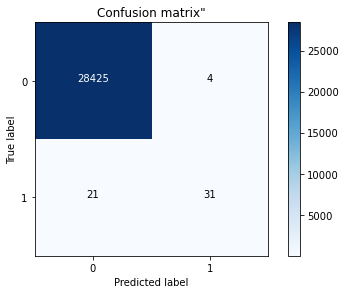

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import itertools
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.1)
clf=LogisticRegression()
clf.fit(train_x,train_y)
predict_y=clf.predict(test_x)
cm=confusion_matrix(test_y,predict_y)
plot_confusion_matrix(cm, classes=[0,1], normalize = False, title = 'Confusion matrix"', cmap = plt.cm.Blues)

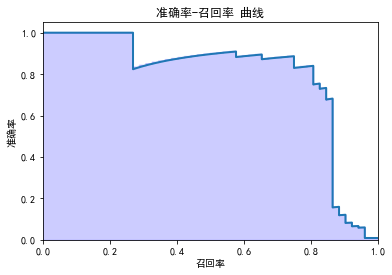

In [30]:
from sklearn.metrics import precision_recall_curve
y_score=clf.decision_function(test_x)
precision,recall,thresholds=precision_recall_curve(test_y,y_score)
plot_precision_recall()

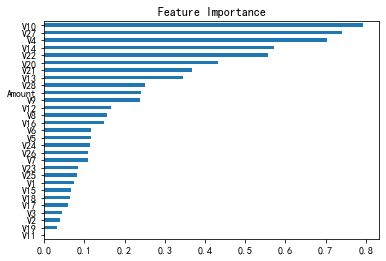

In [31]:
# 显示模型中特征重要性

coeffs = clf.coef_
df_co = pd.DataFrame(np.transpose(abs(coeffs)), columns=["coef_"])
# 下标设置为Feature Name
df_co.index = dataset.columns
df_co.sort_values("coef_", ascending=True, inplace=True)
df_co.coef_.plot(kind="barh")
plt.title("Feature Importance")
plt.show()
